<a href="https://colab.research.google.com/github/KY-39/platform_udt3/blob/main/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_%D0%92%D0%BD%D1%83%D1%82%D1%80%D0%B5%D0%BD%D0%BD%D0%B5%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Автокодировщики. Внутреннее пространство. - соревнование Kaggle

! Не забудьте создать копию ноутбука и в ней работать, чтобы она у Вас сохранилась с Вашими данными работы и обучения в ячейках: Файл - сохранить копию на Диске.


### Установка и загрузка необходимых модулей

In [ ]:
# устанавливаем свежий Kaggle API
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 7.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=1ae06b8c46c7a9ee0ae9fcab1ed2d3f54437092a5b29f4aa26c7f7f3c359ecc6
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


! После установки рекомендуется перезапустить среду выполнения во избежание ошибок запуска ячеек.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization
#from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam 
#from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils 

import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import random
from PIL import Image 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample #для перемешивания выборок 
from skimage import color
import cv2

import os 
import time

# Определение мошеннических транзакций

#Домашнее задание

##**Задание 1.** 
Загрузите из датасета по ссылке ниже базы транзакций - тренировочную и базу для тестирования. С помощью методов, изученных в занятиях по работе с таблицами Pandas, Анализ и обработка данных, и данном занятии, обработайте датасет и подайте в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гиперпараметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Ответ можно улучшить и подавать результат несколько раз.

Ссылка на соревнование:

https://www.kaggle.com/t/15b5dc2793de454cb5499a2cdfe17311

Ссылка на общемировое соревнование: 

https://www.kaggle.com/mlg-ulb/creditcardfraud


Будем использовать датасет нормальных и мошеннических операций, ссылка на источники представлена ниже.

Важно, чтобы компании, выпускающие кредитные карты, могли распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов не взималась плата за товары, которые они не купили.

**Содержание**

Набор данных содержит транзакции, совершенные европейскими держателями кредитных карт в сентябре 2013 года.
В этом наборе данных представлены транзакции, которые произошли за два дня, из которых у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Характеристики V1, V2,… V28 - это основные компоненты, полученные с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция «Сумма» - это сумма транзакции, эту функцию можно использовать для обучения, зависящего от стоимости, в зависимости от примера. Функция «Класс» - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

Учитывая коэффициент дисбаланса класса, мы рекомендуем измерять точность, используя площадь под кривой точности-отзыва (AUPRC). Точность матрицы неточностей не имеет значения для несбалансированной классификации.

Представленный на соревнование датасет уже не имеет столбцов «Время» и «Сумма», а мошеннические операции смешаны с аналогичным числом нормальных и помещены в тестовую выборку для формирования ответов. Задача - обработать и подать данные так, чтобы получить наибольшее совпадение предсказанных меток с верными.

Ссылка на источник:

Сollaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be)

https://www.researchgate.net/project/Fraud-detection-5

Публикации по работе над датасетом:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook


##Решение

#### Создаём правильную папку для ключа Каггл

In [ ]:
!mkdir ~/.kaggle # создаём папку для ключа kaggle в Колабе, она должна быть такой по требованию Каггл

In [ ]:
# переходим в папку, теперь это путь по умолчанию
%cd ~/.kaggle

/root/.kaggle


In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Устанавливаем ключ Каггл, чтобы участвовать в соревнованиях

Нужно зарегистрироваться на Каггл (https://www.kaggle.com/) и скачать ключ для взаимодействия с API соревновательной системы Каггла. После регистрации, справа появятся Ваши имя и фамилия - ссылка на персональную страницу. Нажмите на них. Когда страница загрузится, справа увидите Account. Нажимаете на надпись, затем прокручиваете страницу вниз, до вкладки API, там нажимаете Create New API Token. 
Ключ - это файл kaggle.json, который скачается после нажатия. Нужно скопировать его в папку Google Drive, предварительно её создав: My Drive/datasets/kaggle/ (из Колаба её адрес, который будем указывать для загрузки, такой: /content/drive/My Drive/datasets/kaggle/).

In [ ]:
# нужно зарегистрироваться на Каггл и скачать ключ для взаимодействия с API
# соревновательной системы Каггла kaggle.json. Нужно скопировать его в папку
# Google Drive, предварительно её создав: /content/drive/My Drive/datasets/kaggle/
!cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle --version

Kaggle API 1.5.12


In [ ]:
!ls

kaggle.json	      submission.csv	 udt-3-autoencod.zip
sampleSubmission.csv  train_test_fd.npz


###Подключаемся к системе соревнований, скачиваем датасет

In [ ]:
!kaggle competitions download -c udt-3-autoencod # скачиваем датасет и тестовые данные

 99% 59.0M/59.6M [00:01<00:00, 53.7MB/s]
100% 59.6M/59.6M [00:01<00:00, 42.5MB/s]


###Разархивируем датасет

In [ ]:
# разархивируем данные
import zipfile 
import io
z = zipfile.ZipFile('udt-3-autoencod.zip', 'r') #загрузили из архива, распаковали
z.extractall()
!ls

kaggle.json  sampleSubmission.csv  train_test_fd.npz  udt-3-autoencod.zip


In [ ]:
datasets = np.load('train_test_fd.npz')

In [ ]:
datasets.files

['x_train', 'x_test']

In [ ]:
x_train = datasets['x_train']
x_test = datasets['x_test']

Создадим энкодер в виде 2-х полносвязных слоев.
 
Мы выбрали размерность скрытого пространства равной 2. Это сделано исключительно для возможности наглядного представления распределения точек. Однако для более точной работы автоэнкодера следует использовать скрытые пространства с большей размерностью, например 10.

In [ ]:
latent_dim = 2
inp = Input(shape=(29,))
h1 = Dense(128, activation='relu')(inp)
z = Dense(latent_dim)(h1)
encoder = Model(inp, z)

In [ ]:
encoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_12 (Dense)            (None, 128)               3840      
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 4,098
Trainable params: 4,098
Non-trainable params: 0
_________________________________________________________________


Аналогично создаем декодер

In [ ]:
inp_z = Input(shape=(latent_dim,))
h2 = Dense(128, activation='relu')(inp_z)
out = Dense(29)(h2) 
decoder = Model(inp_z, out)

In [ ]:
decoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_14 (Dense)            (None, 128)               384       
                                                                 
 dense_15 (Dense)            (None, 29)                3741      
                                                                 
Total params: 4,125
Trainable params: 4,125
Non-trainable params: 0
_________________________________________________________________


Определим автоэнкодер как композицию энкодера и декодера:

In [ ]:
ae = Model(inp, decoder(encoder(inp)))

Компилируем автоэнкодер:

In [ ]:
ae.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


И запускаем обучение.

In [ ]:
history = ae.fit(x_train, x_train, epochs=300, batch_size=1024, validation_split=0.1)

Epoch 1/300
250/250 [==============================] - 1s 4ms/step - loss: 0.8086 - mae: 0.5862 - val_loss: 0.6976 - val_mae: 0.5518
Epoch 2/300
250/250 [==============================] - 1s 3ms/step - loss: 0.6545 - mae: 0.5386 - val_loss: 0.6250 - val_mae: 0.5280
Epoch 3/300
250/250 [==============================] - 1s 3ms/step - loss: 0.6059 - mae: 0.5217 - val_loss: 0.5937 - val_mae: 0.5146
Epoch 4/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5804 - mae: 0.5109 - val_loss: 0.5734 - val_mae: 0.5083
Epoch 5/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5620 - mae: 0.5047 - val_loss: 0.5593 - val_mae: 0.5026
Epoch 6/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5469 - mae: 0.4994 - val_loss: 0.5463 - val_mae: 0.4984
Epoch 7/300
250/250 [==============================] - 1s 3ms/step - loss: 0.5330 - mae: 0.4952 - val_loss: 0.5384 - val_mae: 0.4968
Epoch 8/300
250/250 [==============================] - 1s 3ms/step - 

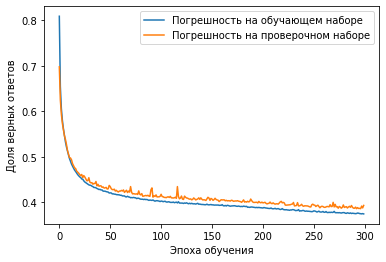

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['loss'], 
         label='Погрешность на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_loss'], 
         label='Погрешность на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

###Делаем предсказания моделью

####Создадим функцию для проверки транзакции:

In [ ]:
def detectFraud(ae, x, std, threshold=2):
    """
    :param ae: автоэнкодер (модель keras)
    :param x: данные для проверки (размерности (1, 29))
    :param std: среднеквадратичная ошибка автоэнкодера на нормальных данных
    :param threshold: порог - параметр критерия. Операция считается мошеннической, если ошибка восстановления превышает среднюю более чем threshold раз.
    :return: True for fraud, False for normal. 
    """
    pred = ae.predict(x)
    e = (pred - x)**2
    mse = e.mean()
    return mse > threshold * std

####Применим нашу функцию ко всем тестовым операциям для разделения на нормальные и мошеннические

In [ ]:
%%time
threshold = 2
std = 0.32
count = 0
detect_list = []
for x in x_test:
    x = x.reshape(1, 29)
    if detectFraud(ae, x, std, threshold=threshold):
        detect_list.append(1)
        count += 1
    else:
        detect_list.append(0)
print("Выявлено мошеннических операций: %d, всего: %d (%.1f%% всех тестовых данных)" % (count, len(x_test), 100 * count / len(x_test)))

Выявлено мошеннических операций: 504, всего: 984 (51.2% всех тестовых данных)
CPU times: user 37 s, sys: 1.47 s, total: 38.4 s
Wall time: 39.7 s


и к нормальным операциям:

In [ ]:
%%time
count = 0
x_train_short = x_train[:len(x_test)] # укоротили массив для увеличения скорости обработки
for x in x_train_short:
    x = x.reshape(1, 29)
    if detectFraud(ae, x, std, threshold=threshold):
        count += 1
print("Выявлено мошеннических операций: %d, всего: %d (%.1f%% всех нормальных данных)" % (count, len(x_train_short), 100 * count / len(x_train_short)))

Выявлено мошеннических операций: 129, всего: 984 (13.1% всех нормальных данных)
CPU times: user 35.4 s, sys: 1.48 s, total: 36.8 s
Wall time: 36.5 s


С уменьшением порога threshold увеличивается процент выявленных мошеннических транзакций, однако одновременно с этим увеличивается число ложных срабатываний на нормальных операциях.

###Переводим ответ в правильный формат, отсылаем для подсчёта рейтинга

In [ ]:
submission = pd.DataFrame({"Id":range(1,len(x_test)+1),"Label":detect_list})
submission.head()

,Id,Label
0,1,1
1,2,1
2,3,0
3,4,1
4,5,1


Посмотрим распределение точек в скрытом пространстве

In [ ]:
z_clean = encoder.predict(x_test[submission["Label"]==0])
z_fraud = encoder.predict(x_test[submission["Label"]==1])

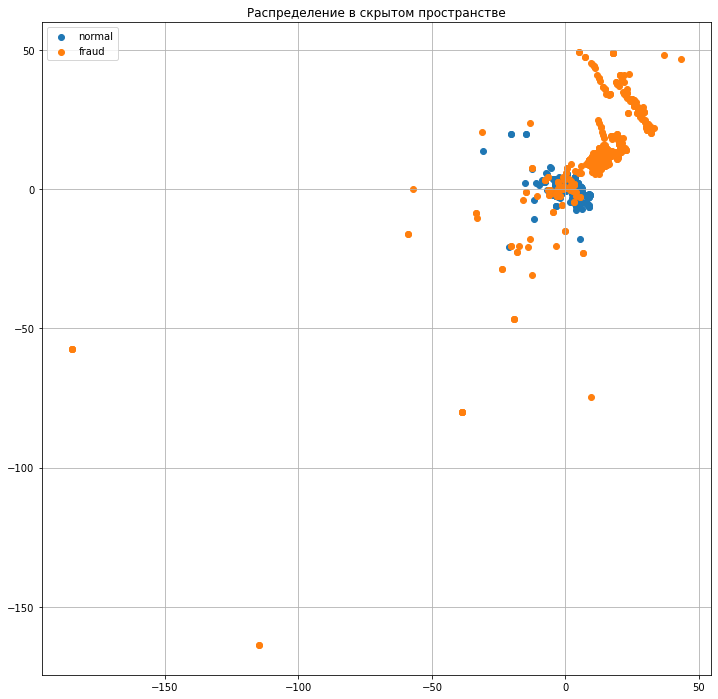

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(z_clean[:, 0], z_clean[:, 1], label='normal')
plt.scatter(z_fraud[:, 0], z_fraud[:, 1], label='fraud')
plt.grid()
plt.legend()
plt.title('Распределение в скрытом пространстве')
plt.show()

In [ ]:
submission = submission.to_csv('./submission.csv', sep=',', index=False, header=True)

In [ ]:
!kaggle competitions submit -c udt-3-autoencod -f submission.csv -m "Message"

100% 5.67k/5.67k [00:00<00:00, 14.1kB/s]
Successfully submitted to Университет Цифровых Технологий платформа 3

###Переходим по ссылке, чтобы увидеть таблицу лидеров.

https://www.kaggle.com/c/udt-3-autoencod/leaderboard

#Литература

1. https://www.tensorflow.org/tutorials/generative/autoencoder
2. https://medium.com/analytics-vidhya/autoencoders-with-tensorflow-2f0a7315d161
3. https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/
4. https://blog.keras.io/building-autoencoders-in-keras.html
5. https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html


##End